## I. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("used_car_dataset.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(9997, 14)

#### Printing out a few columns for better visualization of data

In [5]:
dataset.head(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


#### Finding the number of categories in categorical variables

In [6]:
dataset["manufacturer"].value_counts()

ford      9008
subaru     989
Name: manufacturer, dtype: int64

In [7]:
dataset["condition"].value_counts()

excellent    4879
good         3567
like new     1181
fair          370
Name: condition, dtype: int64

In [8]:
dataset["cylinders"].value_counts()

6 cylinders    3637
8 cylinders    3233
4 cylinders    3127
Name: cylinders, dtype: int64

In [9]:
dataset["fuel"].value_counts()

gas    9997
Name: fuel, dtype: int64

In [10]:
dataset["transmission"].value_counts()

automatic    9440
manual        557
Name: transmission, dtype: int64

In [11]:
dataset["type"].value_counts()


SUV       3065
sedan     2626
truck     2569
pickup    1737
Name: type, dtype: int64

In [12]:
dataset["paint_color"].value_counts()


white     3389
black     2052
silver    1604
red       1580
blue      1372
Name: paint_color, dtype: int64

In [13]:
dataset["F4"].value_counts()


b    3438
a    3313
c    3246
Name: F4, dtype: int64

## III. Data Preprocessing ####

#### Changing object datatype into categorical in order to perform label encoding

In [20]:
dataset["manufacturer"] = dataset["manufacturer"].astype('category')
dataset["condition"] = dataset["condition"].astype('category')
dataset["fuel"] = dataset["fuel"].astype('category')
dataset["transmission"] = dataset["transmission"].astype('category')
dataset["cylinders"] = dataset["cylinders"].astype('category')
dataset["type"] = dataset["type"].astype('category')
dataset["paint_color"] = dataset["paint_color"].astype('category')
dataset["F4"] = dataset["F4"].astype('category')

#### Checking to see if all datatypes are numerical or category

In [21]:
dataset.dtypes

price            float64
year             float64
manufacturer    category
condition       category
cylinders       category
fuel            category
odometer         float64
transmission    category
type            category
paint_color     category
F1                 int64
F2               float64
F3               float64
F4              category
dtype: object

#### Changing the categorical variables into numerical values using label encoding

In [22]:
dataset["manufacturer"] = dataset["manufacturer"].cat.codes
dataset["condition"] = dataset["condition"].cat.codes
dataset["fuel"] = dataset["fuel"].cat.codes
dataset["transmission"] = dataset["transmission"].cat.codes
dataset["cylinders"] = dataset["cylinders"].cat.codes
dataset["type"] = dataset["type"].cat.codes
dataset["paint_color"] = dataset["paint_color"].cat.codes
dataset["F4"] = dataset["F4"].cat.codes

In [23]:
dataset.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,0,0,2,0,86238.0,0,1,0,5823,2.193844,-0.031986,1
1,800.0,2008.0,0,0,1,0,170953.0,0,0,2,2024,2.133691,0.097985,1
2,23660.0,2016.0,0,2,2,0,119026.0,0,3,4,294,2.160859,0.046984,2
3,5335.0,2009.0,0,0,0,0,69000.0,1,2,1,3544,2.114929,-0.110121,2
4,1597.0,1999.0,0,2,1,0,59130.0,0,2,1,1329,1.829625,-0.060615,2


#### Check to see if there are any null values that need to be replaced 

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
price           9997 non-null float64
year            9997 non-null float64
manufacturer    9997 non-null int8
condition       9997 non-null int8
cylinders       9997 non-null int8
fuel            9997 non-null int8
odometer        9331 non-null float64
transmission    9997 non-null int8
type            9997 non-null int8
paint_color     9997 non-null int8
F1              9997 non-null int64
F2              9997 non-null float64
F3              9997 non-null float64
F4              9997 non-null int8
dtypes: float64(5), int64(1), int8(8)
memory usage: 546.8 KB


#### Filling all the Nan values with median for easier processing

In [25]:
dataset.fillna(dataset.median(), inplace=True)

#### Analysing the 'target' variable

In [26]:
dataset["price"].describe()

count      9997.000000
mean      14262.349305
std       12520.818169
min           0.000000
25%        5643.000000
50%       10463.000000
75%       19464.000000
max      402498.000000
Name: price, dtype: float64

## Exploratory Data Analysis (EDA)

#### Plotting a boxplot to identify outliers 

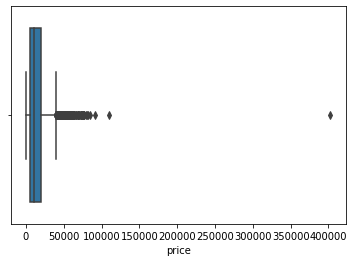

In [27]:
sns.boxplot(x=dataset['price'])

#### Removing outlier, i.e.,those rows in the dataset with a value above 10000

In [28]:
dataset= dataset[dataset['price']<100000]

#### Checking to see if those rows have been removed 

In [29]:
dataset.shape

(9995, 14)

#### Finding correlation between other 'predictors' and target variable

In [30]:
print(dataset.corr()["price"].abs().sort_values(ascending=False))

price           1.000000
odometer        0.389441
year            0.338780
F2              0.307032
F1              0.205325
cylinders       0.179774
F3              0.102439
type            0.089504
transmission    0.060129
manufacturer    0.036038
condition       0.025075
paint_color     0.015097
F4              0.010153
fuel                 NaN
Name: price, dtype: float64


#### Plotting a heatmap in order to understand correlation between variables better 

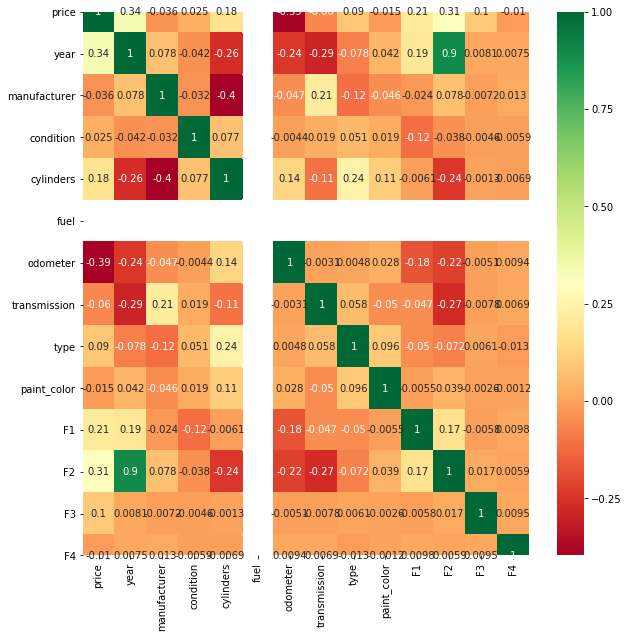

In [31]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


#### Dropping the columns(features) that are not very useful in our calculations

In [32]:
dataset.drop(['fuel', 'F2', 'F4','paint_color'], axis='columns', inplace=True)

In [33]:
dataset.head()

,price,year,manufacturer,condition,cylinders,odometer,transmission,type,F1,F3
0,18219.0,2008.0,0,0,2,86238.0,0,1,5823,-0.031986
1,800.0,2008.0,0,0,1,170953.0,0,0,2024,0.097985
2,23660.0,2016.0,0,2,2,119026.0,0,3,294,0.046984
3,5335.0,2009.0,0,0,0,69000.0,1,2,3544,-0.110121
4,1597.0,1999.0,0,2,1,59130.0,0,2,1329,-0.060615


#### Instead of manual selection, we can also use sklearn SelectKBest features  

In [34]:
# from sklearn.feature_selection import SelectKBest, f_regression
# X_reg_new=SelectKBest(score_func=f_regression).fit_transform(predictors,target)

#### Understanding the relationship between odometer and price 

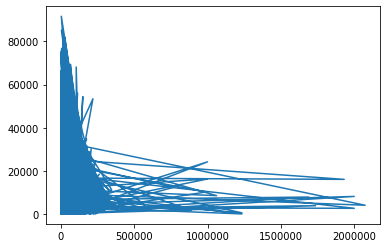

In [35]:
plt.plot(dataset["odometer"],dataset["price"])

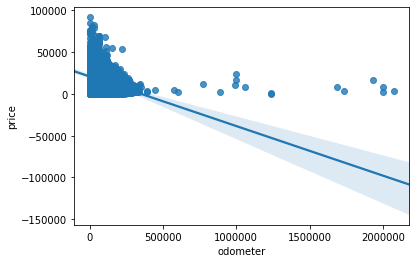

In [36]:
sns.regplot(x="odometer", y="price", data=dataset)

#### Understanding the relationship between year and price 

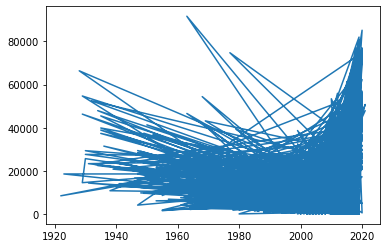

In [37]:
plt.plot(dataset["year"],dataset["price"])

#### Understanding the relationship between F1 modification and price 

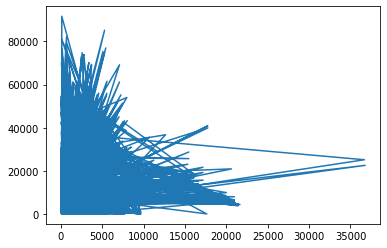

In [38]:
plt.plot(dataset["F1"],dataset["price"])

#### Understanding the relationship between cylinders and price 

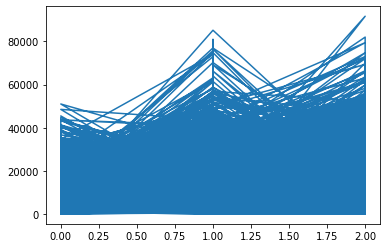

In [39]:
plt.plot(dataset["cylinders"],dataset["price"])

#### Understanding the relationship between F3 and price 

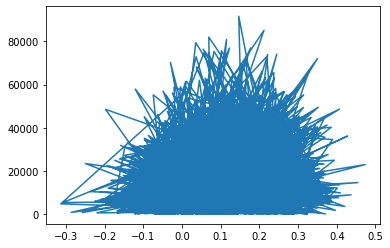

In [40]:
plt.plot(dataset["F3"],dataset["price"])

#### Calculating slope of the price-odometer graph for better statistical understaing

In [41]:
from scipy.stats import linregress
linregress(dataset["odometer"], dataset["price"])

LinregressResult(slope=-0.059366763563861565, intercept=20857.858150257125, rvalue=-0.3894408058073831, pvalue=0.0, stderr=0.001404552209033071)

## IV. Train Test split

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#### Setting price as the dependent/target variable and the rest of the variables are predictors

In [43]:
predictors = dataset.drop("price",axis=1)
target = dataset["price"]

In [75]:
# scaling (the df is converted to a numpy array)
cols = predictors.columns
predictors = pd.DataFrame(scale(predictors))
predictors.columns = cols
predictors.columns


Index(['year', 'manufacturer', 'condition', 'cylinders', 'odometer',
       'transmission', 'type', 'F1', 'F3'],
      dtype='object')

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,train_size=0.80,test_size=0.20,random_state=100)

## V. Model Fitting

In [77]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


### Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# fit
lr.fit(X_train, Y_train)
# predict 
y_pred_lr = lr.predict(X_test)

In [79]:
y_pred_lr.shape

(1999,)

In [80]:
print(r2_score(y_true=Y_test, y_pred=y_pred_lr))

0.34052593761935634


In [81]:
rmse_lr = sqrt(mean_squared_error(Y_test, y_pred_lr))
print(rms)

9469.429264548304


### LASSO

In [82]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=1.0)
# fit model
la.fit(X_train, Y_train)
# make a prediction
y_pred_la = la.predict(X_test)

In [83]:
print(r2_score(y_true=Y_test, y_pred=y_pred_la))

0.34052152148893156


In [84]:
rmse_lasso = sqrt(mean_squared_error(Y_test, y_pred_la))
print(rms)

9469.429264548304


### Ridge Regression

In [85]:

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0, normalize = True)
# fit model
ridge.fit(X_train, Y_train)  
# Use this model to predict the test data
y_pred_rr = ridge.predict(X_test)           

In [86]:
print(r2_score(y_true=Y_test, y_pred=y_pred_rr))


0.34052593761935646


In [87]:
rmse_rr = sqrt(mean_squared_error(Y_test, y_pred_rr))
print(rms)

9469.429264548304


####  Comparison of the models

In [88]:
rmse = [rmse_lr, rmse_lasso, rmse_rr]
model = ["Linear Regression","LASSO","Ridge Regression"]    


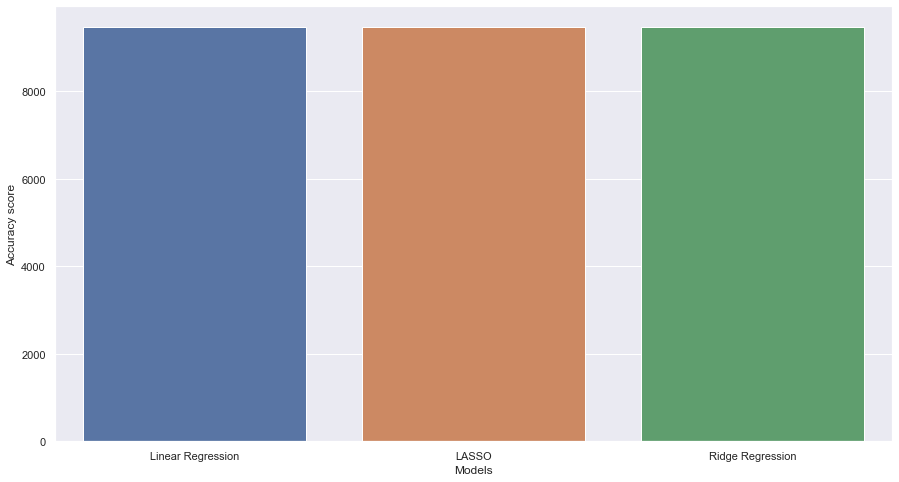

In [89]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Models")
plt.ylabel("Root Mean Square Error")

sns.barplot(model,rmse)